# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [94]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_df = pd.merge(mouse_metadata, study_results, how='inner', on='Mouse ID')

# Display the data table for preview
mouse_df.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [95]:
# Checking the number of mice.
print(len(mouse_df))
mouse_df['Mouse ID'].value_counts()

1893


Mouse ID
g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: count, Length: 249, dtype: int64

In [96]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = duplicates = mouse_df.duplicated(subset = ['Mouse ID','Timepoint'])
dup_sort = duplicates.sort_values(ascending = False).head(5)
dup_sort

915    True
913    True
911    True
909    True
917    True
dtype: bool

In [97]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_df = mouse_df.drop_duplicates(
    subset = ['Mouse ID','Timepoint'],
    keep = 'first'
)

In [98]:
# Checking the number of mice in the clean DataFrame.
print(len(mouse_df)) # Number of data entries dropped by five, which is the number of duplicates.
mouse_df['Mouse ID'].value_counts()

1888


Mouse ID
k403    10
o287    10
j755    10
j984    10
k210    10
        ..
f932     1
v199     1
t573     1
b447     1
u153     1
Name: count, Length: 249, dtype: int64

In [99]:
unique_time = mouse_df.groupby('Drug Regimen').size()
unique_time = unique_time.sort_values(ascending=False)
unique_time

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     156
dtype: int64

## Summary Statistics

In [100]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
agg_mouse_df = mouse_df.groupby(['Drug Regimen'])
summary_stats = pd.DataFrame({
    'Mean': agg_mouse_df['Tumor Volume (mm3)'].mean(), 'Median': agg_mouse_df['Tumor Volume (mm3)'].median(),
    'Variance': agg_mouse_df['Tumor Volume (mm3)'].var(), 'Standard Deviation': agg_mouse_df['Tumor Volume (mm3)'].std(),
    'SEM': agg_mouse_df['Tumor Volume (mm3)'].sem()})
# agg_mouse_df
summary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [101]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
agg_mouse_df['Tumor Volume (mm3)'].agg(func=['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

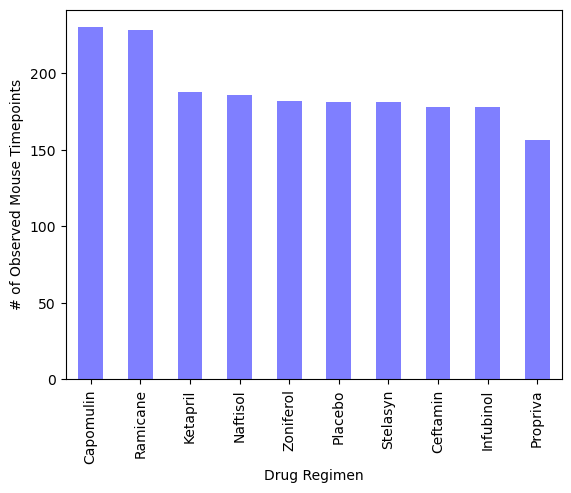

In [102]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
unique_time.plot(kind='bar', color='blue', alpha=0.5, xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints')

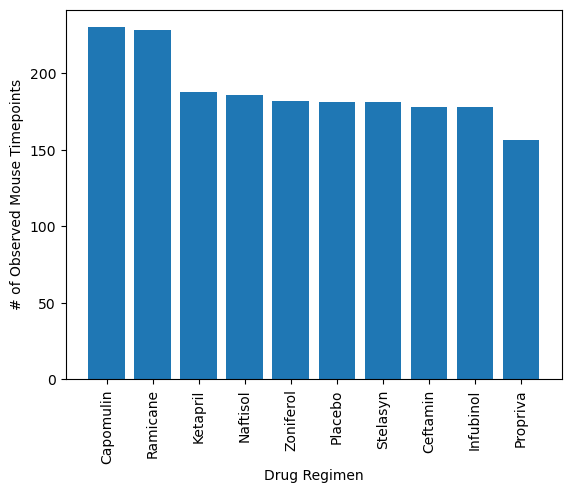

In [103]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = unique_time.keys()
y_axis = unique_time
plt.bar(x=x_axis, height=y_axis)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

In [104]:
mouse_sex = mouse_df.groupby('Sex').size()
mouse_sex

Sex
Female    930
Male      958
dtype: int64

<Axes: >

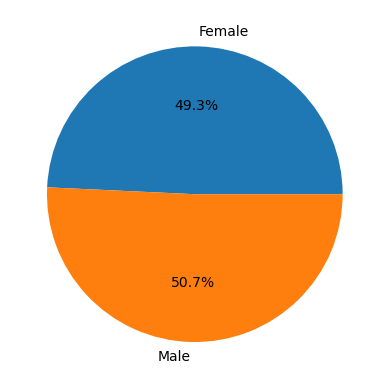

In [105]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex.plot(kind='pie', y='Sex', autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x7f9a40c75930>,
 [Text(0.025622998006324463, 1.099701533132135, 'Female'),
  Text(-0.025623100967812958, -1.099701530733132, 'Male')],
 [Text(0.013976180730722433, 0.5998371998902553, '49.3%'),
  Text(-0.01397623689153434, -0.5998371985817083, '50.7%')])

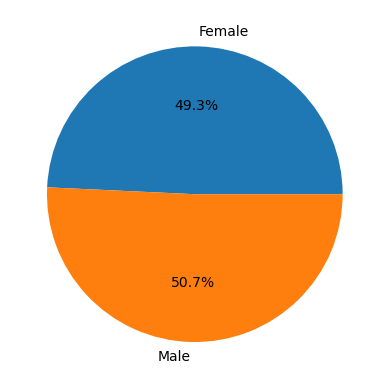

In [106]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = mouse_sex.keys()
sizes = mouse_sex
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

## Quartiles, Outliers and Boxplots

In [107]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Need to group by the Mouse ID, but merge with original data so it shows which drug regimen each mouse got.
key_regs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
target_reg = mouse_df.loc[mouse_df['Drug Regimen'].isin(key_regs)]
target_reg = target_reg.groupby('Mouse ID').max('Timepoint')
target_reg = pd.merge(target_reg, mouse_df, on='Mouse ID', how='left')
target_reg = target_reg[['Mouse ID', 'Age_months_x', 'Weight (g)_x', 'Timepoint_x', 'Tumor Volume (mm3)_x', 'Metastatic Sites_x', 'Drug Regimen']]
target_reg = target_reg.rename(columns={'Age_months_x': 'Age (months)',
                                'Weight (g)_x': 'Weight (g)',
                                'Timepoint_x': 'Timepoint',
                                'Tumor Volume (mm3)_x': 'Tumor Volume (mm3)',
                                'Metastatic Sites_x': 'Metastatic Sites'})
target_reg = target_reg.drop_duplicates('Mouse ID').reset_index(drop=True)
target_reg

,Mouse ID,Age (months),Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen
0,a203,20,23,45,67.973419,2,Infubinol
1,a251,21,25,45,65.525743,1,Infubinol
2,a275,20,28,45,62.999356,3,Ceftamin
3,a411,3,22,45,45.466677,1,Ramicane
4,a444,10,25,45,45.000000,0,Ramicane
...,...,...,...,...,...,...,...
95,y769,6,27,45,68.594745,4,Ceftamin
96,y793,17,17,45,45.000000,2,Capomulin
97,y865,23,26,45,64.729837,3,Ceftamin
98,z578,11,16,45,45.000000,0,Ramicane


In [109]:
# Put treatments into a list for a for loop (and later for plot labels)
key_regs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for index, row in target_reg.iterrows():
  tumor_vol_data.append(row['Tumor Volume (mm3)'])
    # Locate the rows which contain mice on each drug and get the tumor volumes
  
    
    # add subset 

    
    # Determine outliers using upper and lower bounds



14.420417467499995

In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
